In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Ghatering Data

In [51]:
makasar = pd.read_excel('Data_magang/MAKASSAR.xlsx')

## Assessing Data

In [52]:
makasar.describe(include="all")

,Unnamed: 0,CONSIGNEE,CARGO,grade_0,grade_1,grade_2,size_0,size_1,Lead Time (Days)
count,33326.000000,33326.000000,33326.000000,33326.000000,33326.00000,33326.000000,33326.000000,33326.000000,33326.000000
mean,16662.500000,822.494929,76.444668,0.761928,0.13830,0.099772,0.728470,0.271530,5.851647
std,9620.531872,504.143115,32.358423,0.425910,0.34522,0.299700,0.444755,0.444755,5.396452
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,8331.250000,357.000000,51.000000,1.000000,0.00000,0.000000,0.000000,0.000000,3.000000
50%,16662.500000,870.000000,81.000000,1.000000,0.00000,0.000000,1.000000,0.000000,5.000000
75%,24993.750000,1306.000000,90.000000,1.000000,0.00000,0.000000,1.000000,1.000000,7.000000
max,33325.000000,1591.000000,145.000000,1.000000,1.00000,1.000000,1.000000,1.000000,100.000000


In [53]:
makasar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33326 entries, 0 to 33325
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        33326 non-null  int64
 1   CONSIGNEE         33326 non-null  int64
 2   CARGO             33326 non-null  int64
 3   grade_0           33326 non-null  int64
 4   grade_1           33326 non-null  int64
 5   grade_2           33326 non-null  int64
 6   size_0            33326 non-null  int64
 7   size_1            33326 non-null  int64
 8   Lead Time (Days)  33326 non-null  int64
dtypes: int64(9)
memory usage: 2.3 MB


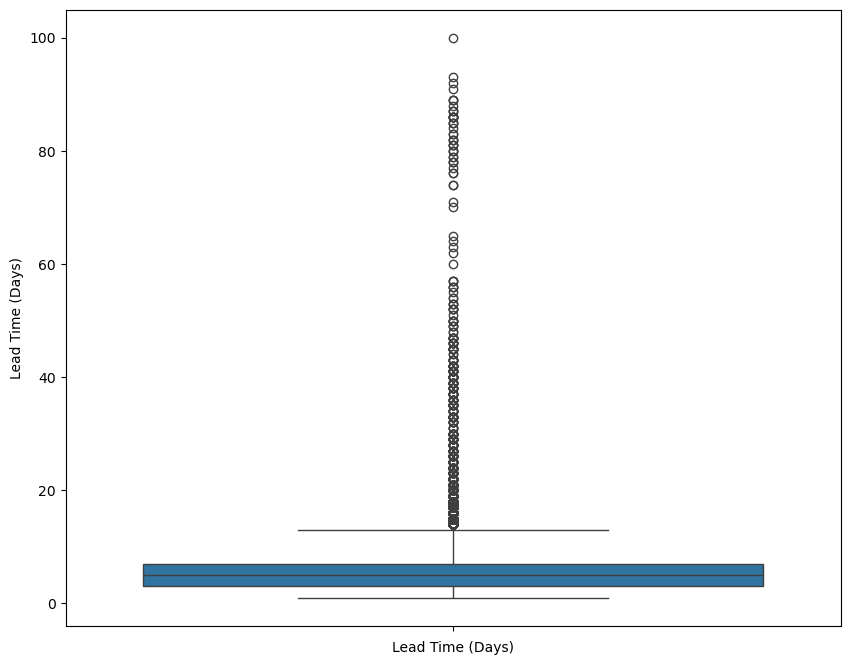

In [284]:
plt.figure(figsize=(10,8))
sns.boxplot(makasar['Lead Time (Days)'])
plt.xlabel('Lead Time (Days)')
plt.show()

## EDA

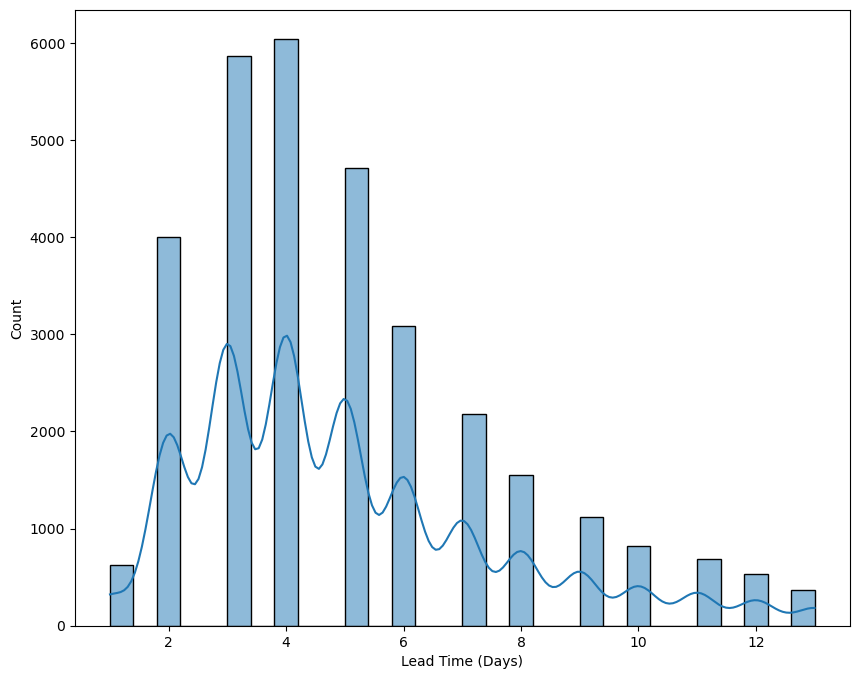

In [297]:
plt.figure(figsize=(10,8))
sns.histplot(makasar['Lead Time (Days)'], bins=30, kde=True);

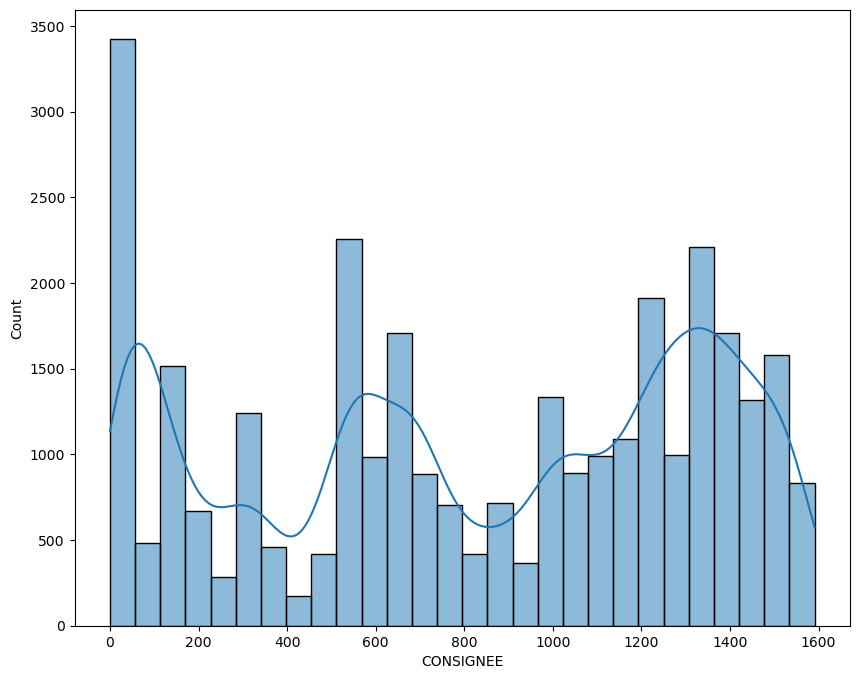

In [295]:
plt.figure(figsize=(10,8))
sns.histplot(makasar['CONSIGNEE'], kde=True);

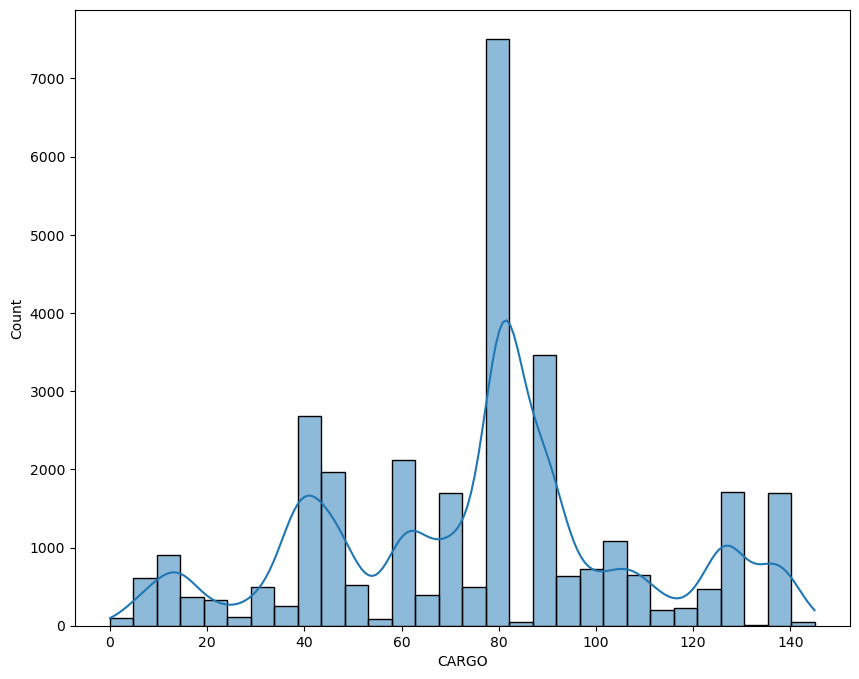

In [296]:
plt.figure(figsize=(10,8))
sns.histplot(makasar['CARGO'], bins=30, kde=True);

In [146]:
makasar.groupby('Lead Time (Days)').agg({"CONSIGNEE":"nunique"}).head()

,CONSIGNEE
Lead Time (Days),
1,193
2,586
3,689
4,734
5,632


In [160]:
makasar.groupby('Lead Time (Days)').agg({"CONSIGNEE":"nunique"}).tail(10)

,CONSIGNEE
Lead Time (Days),
84,1
85,2
86,2
87,2
88,1
89,2
91,1
92,1
93,1


In [233]:
most_leadtime = makasar.groupby('Lead Time (Days)').agg({"CONSIGNEE":"nunique"}).sort_values(by="CONSIGNEE", ascending=False).head()
most_leadtime

,CONSIGNEE
Lead Time (Days),
4,734
3,689
5,632
2,586
6,477


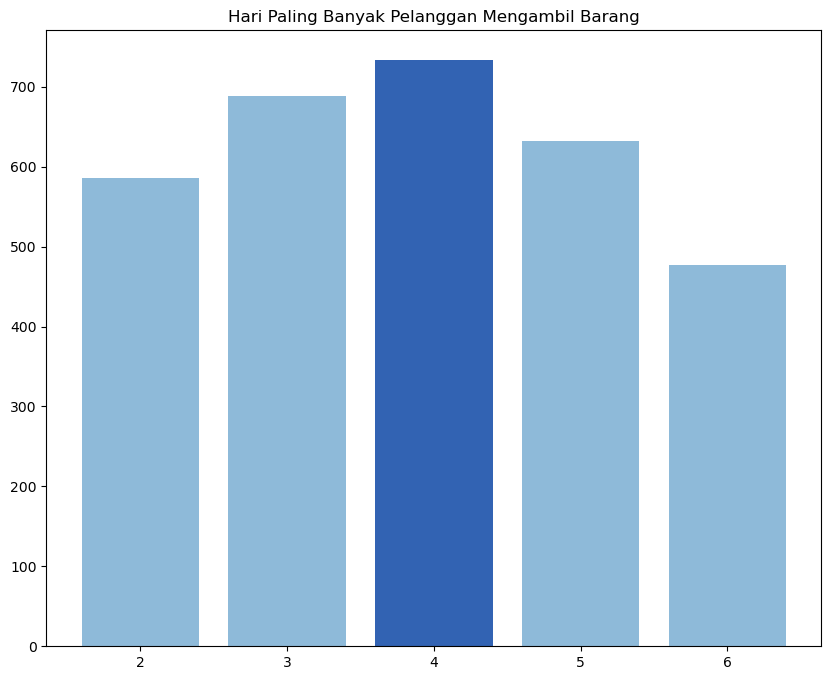

In [276]:
plt.figure(figsize=(10,8))
plt.bar(most_leadtime.index, most_leadtime["CONSIGNEE"], color=['#3263b3','#8EBAD9','#8EBAD9','#8EBAD9', '#8EBAD9'])
plt.title("Hari Paling Banyak Pelanggan Mengambil Barang")
plt.show()

In [239]:
most_leadtime_morethan_week = makasar.groupby('Lead Time (Days)').agg({"CONSIGNEE":"nunique"})[14:].sort_values(by="CONSIGNEE", ascending=False).head()
most_leadtime_morethan_week

,CONSIGNEE
Lead Time (Days),
15,80
16,71
17,49
18,49
19,43


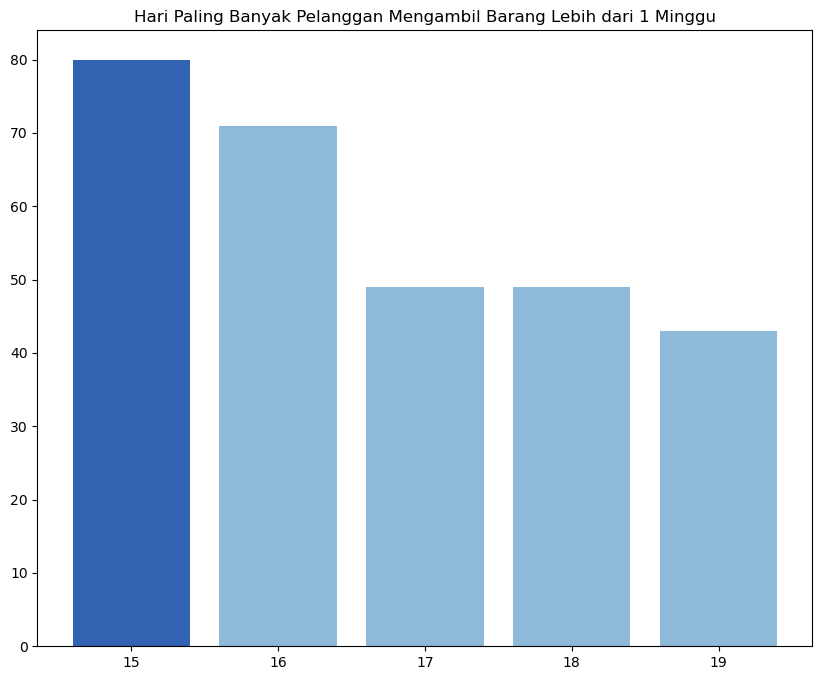

In [275]:
plt.figure(figsize=(10,8))
plt.bar(most_leadtime_morethan_week.index, most_leadtime_morethan_week["CONSIGNEE"],color=['#3263b3','#8EBAD9','#8EBAD9','#8EBAD9', '#8EBAD9'])
plt.title("Hari Paling Banyak Pelanggan Mengambil Barang Lebih dari 1 Minggu")
plt.show()

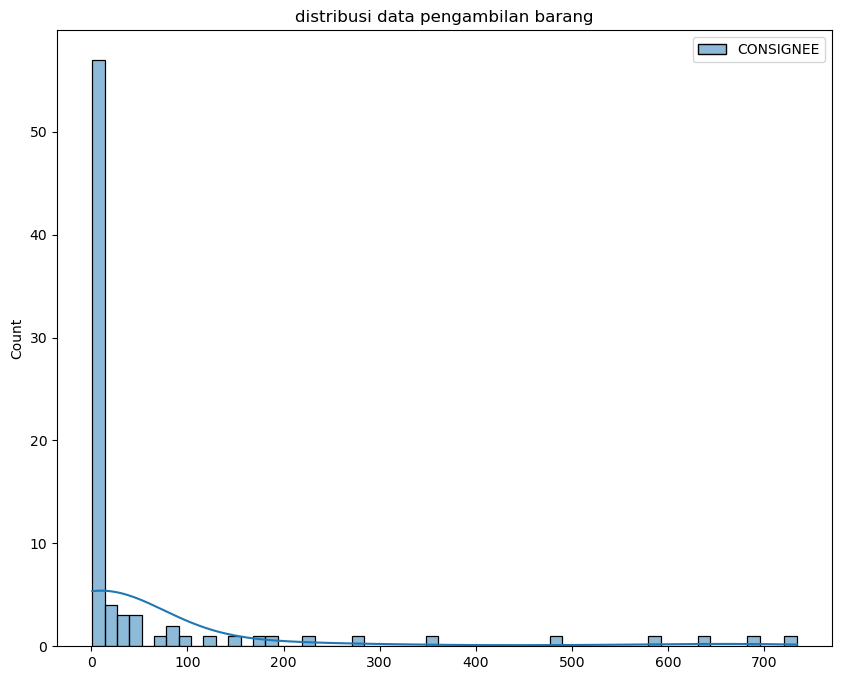

In [263]:
plt.figure(figsize=(10,8))
sns.histplot(makasar.groupby('Lead Time (Days)').agg({"CONSIGNEE":"nunique"}), kde=True)
plt.title("distribusi data pengambilan barang")
plt.show()

In [147]:
makasar.groupby('Lead Time (Days)').agg({"CARGO":"nunique"}).head()

,CARGO
Lead Time (Days),
1,60
2,104
3,114
4,107
5,98


In [162]:
makasar.groupby('Lead Time (Days)').agg({"CARGO":"nunique"}).tail(10)

,CARGO
Lead Time (Days),
84,1
85,2
86,1
87,1
88,1
89,2
91,1
92,1
93,1


In [237]:
most_leadtime_based_cargo = makasar.groupby('Lead Time (Days)').agg({"CARGO":"nunique"}).sort_values(by="CARGO", ascending=False).head()
most_leadtime_based_cargo

,CARGO
Lead Time (Days),
3,114
4,107
2,104
5,98
6,80


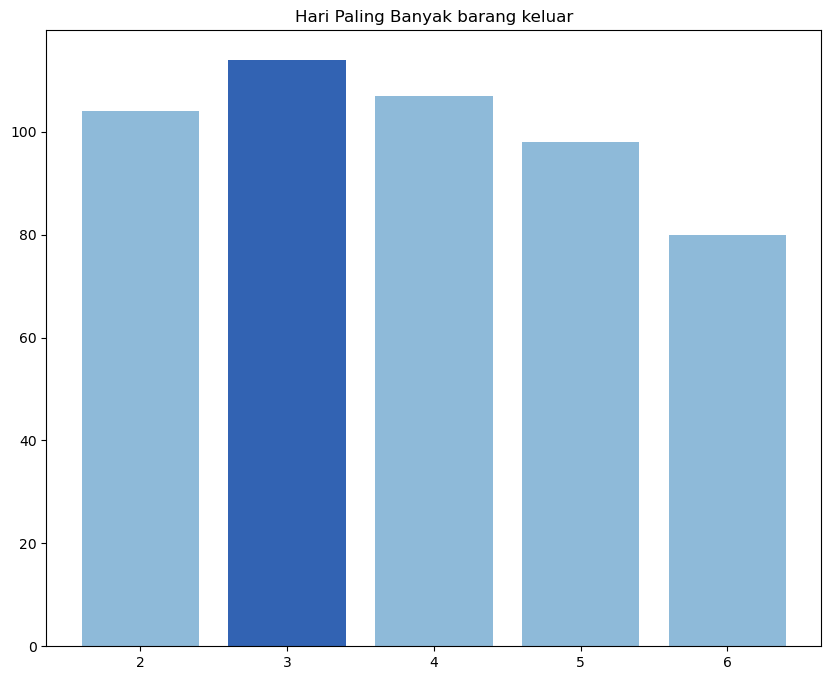

In [274]:
plt.figure(figsize=(10,8))
plt.bar(most_leadtime_based_cargo.index, most_leadtime_based_cargo["CARGO"], color=['#3263b3','#8EBAD9','#8EBAD9','#8EBAD9', '#8EBAD9'])
plt.title("Hari Paling Banyak barang keluar")
plt.show()

In [235]:
most_leadtime_cargo_morethan_week = makasar.groupby('Lead Time (Days)').agg({"CARGO":"nunique"})[14:].sort_values(by="CARGO", ascending=False).head()
most_leadtime_cargo_morethan_week

,CARGO
Lead Time (Days),
15,36
16,30
18,26
17,23
19,23


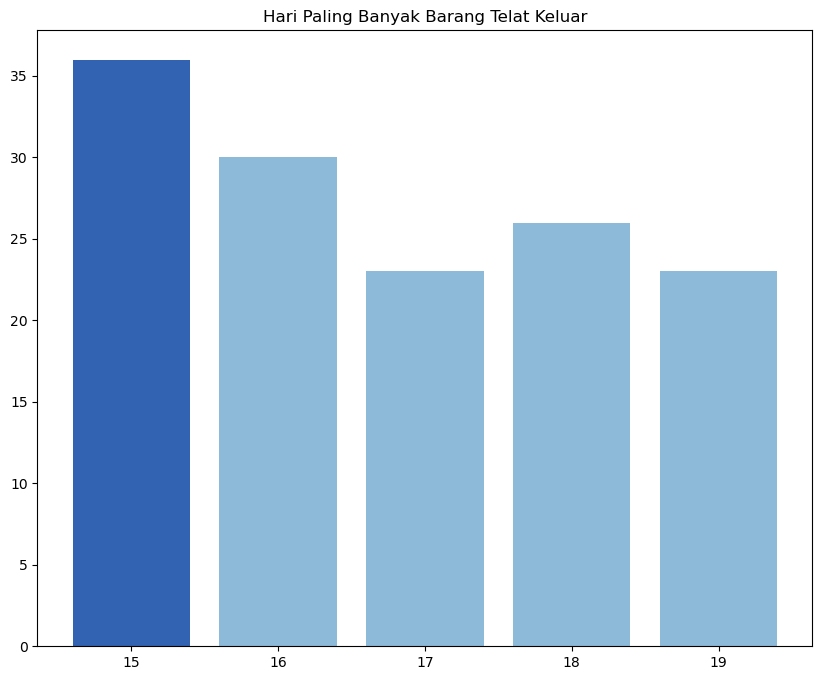

In [273]:
plt.figure(figsize=(10,8))
plt.bar(most_leadtime_cargo_morethan_week.index, most_leadtime_cargo_morethan_week["CARGO"], color=['#3263b3','#8EBAD9','#8EBAD9','#8EBAD9','#8EBAD9'])
plt.title("Hari Paling Banyak Barang Telat Keluar")
plt.show()

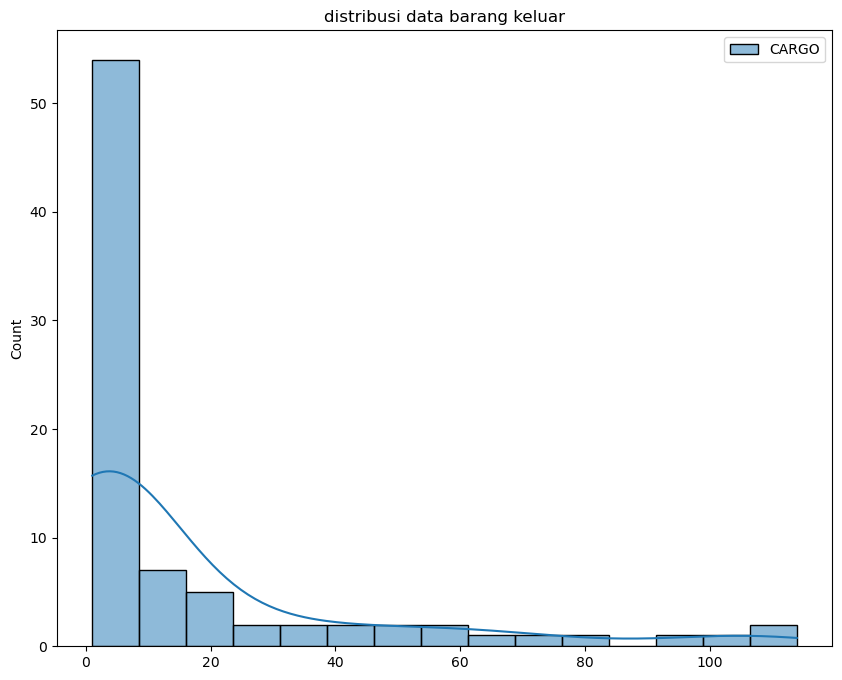

In [264]:
plt.figure(figsize=(10,8))
sns.histplot(makasar.groupby('Lead Time (Days)').agg({"CARGO":"nunique"}), kde=True, color="#619cfa")
plt.title("distribusi data barang keluar")
plt.show()

In [163]:
pd.crosstab(makasar["Lead Time (Days)"], makasar["CARGO"])

CARGO,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
Lead Time (Days),,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,0,1,2,13,0,7,...,17,0,0,0,0,0,1,0,0,1
2,1,1,15,1,3,3,14,56,5,59,...,105,1,7,0,25,0,2,4,0,1
3,1,0,27,1,4,2,18,66,6,63,...,169,0,14,2,28,1,1,1,1,6
4,2,1,12,0,3,5,9,59,2,36,...,238,0,19,2,79,0,1,1,0,3
5,4,0,7,0,0,0,7,39,3,19,...,161,0,13,0,97,0,3,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
pd.crosstab(makasar["CONSIGNEE"], makasar["Lead Time (Days)"]).head()

Lead Time (Days),1,2,3,4,5,6,7,8,9,10,...,84,85,86,87,88,89,91,92,93,100
CONSIGNEE,,,,,,,,,,,,,,,,,,,,,
0,0,6,20,21,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,6,6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
pd.crosstab(makasar["CARGO"], makasar["Lead Time (Days)"]).head()

Lead Time (Days),1,2,3,4,5,6,7,8,9,10,...,84,85,86,87,88,89,91,92,93,100
CARGO,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,15,27,12,7,2,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,4,3,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
makasar[makasar["Lead Time (Days)"]>14].CONSIGNEE.nunique()

175

## Cleaning Data

In [58]:
makasar.drop(columns=['Unnamed: 0'], inplace=True)

In [287]:
Q1 = makasar['Lead Time (Days)'].quantile(0.25)
Q3 = makasar['Lead Time (Days)'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

makasar = makasar[(makasar['Lead Time (Days)'] >= batas_bawah) & (makasar['Lead Time (Days)'] <= batas_atas)]

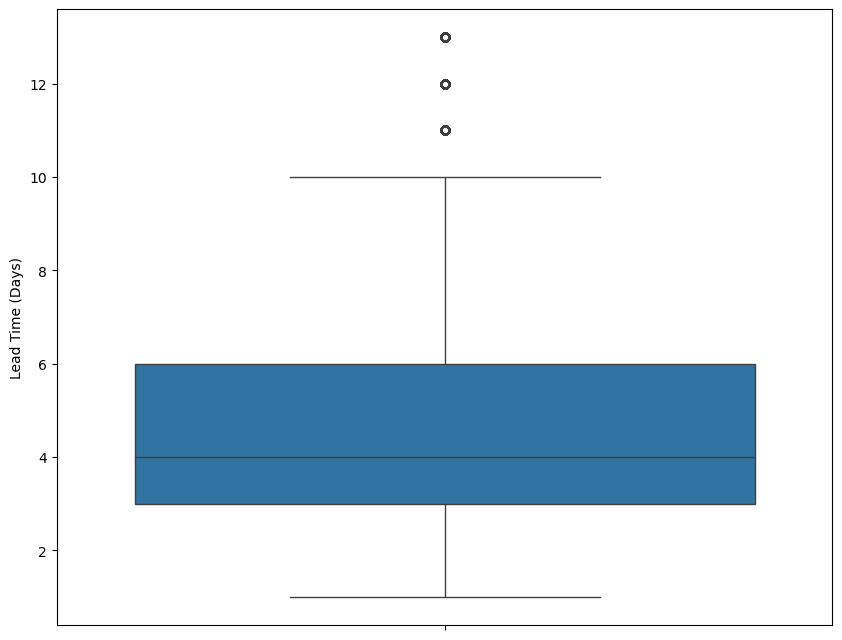

In [290]:
plt.figure(figsize=(10,8))
sns.boxplot(makasar['Lead Time (Days)'])
plt.show()

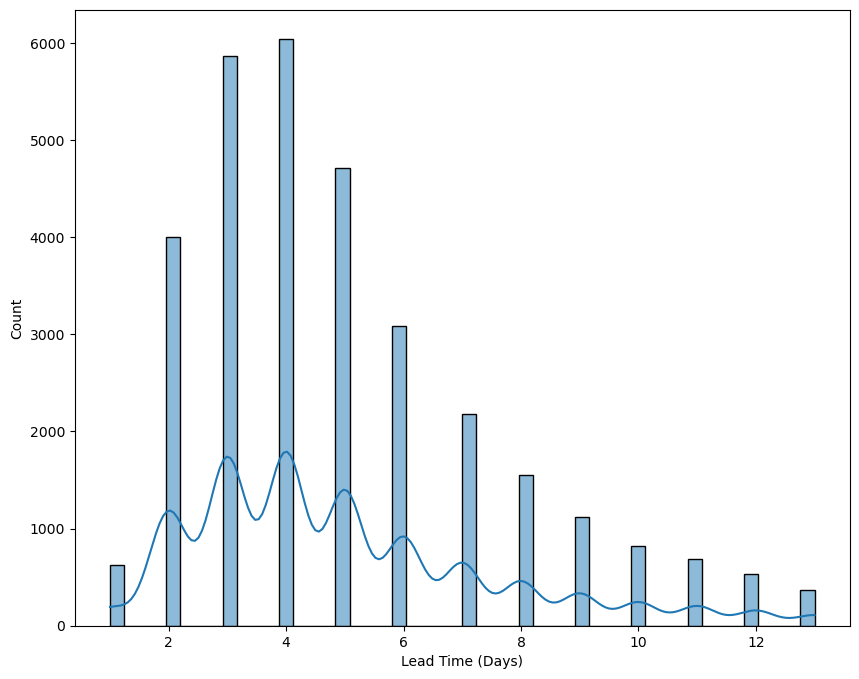

In [298]:
plt.figure(figsize=(10,8))
sns.histplot(makasar['Lead Time (Days)'], bins=50, kde=True);

In [292]:
makasar.describe(include="all")

,CONSIGNEE,CARGO,grade_0,grade_1,grade_2,size_0,size_1,Lead Time (Days)
count,31581.000000,31581.000000,31581.000000,31581.000000,31581.000000,31581.000000,31581.000000,31581.000000
mean,825.385738,75.958203,0.762009,0.137899,0.100092,0.726259,0.273741,4.974890
std,501.213646,32.384677,0.425860,0.344800,0.300127,0.445884,0.445884,2.603434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,378.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,870.000000,81.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000
75%,1306.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000
max,1591.000000,145.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [293]:
batas_atas, batas_bawah

(13.0, -3.0)

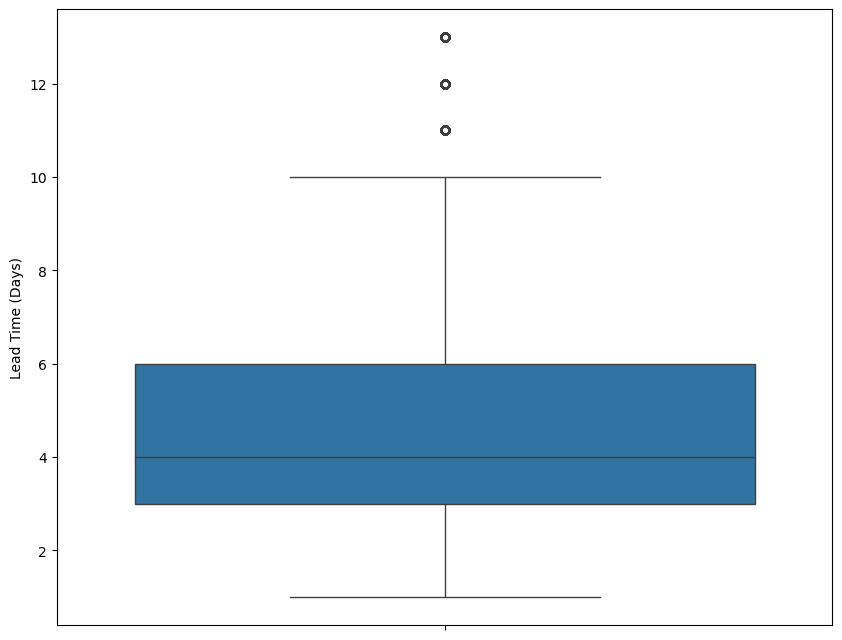

In [294]:
plt.figure(figsize=(10,8))
sns.boxplot(makasar['Lead Time (Days)'])
plt.show()

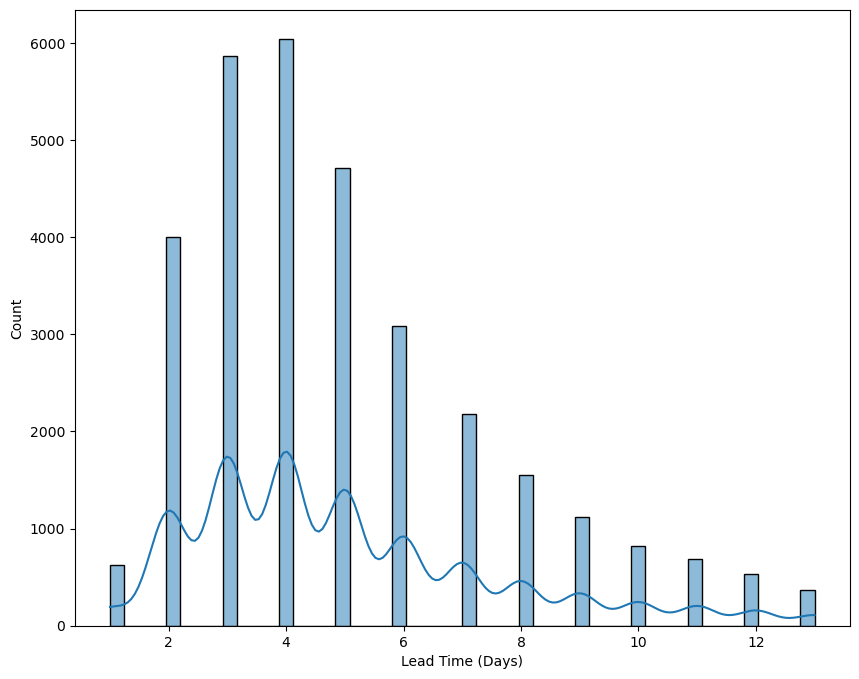

In [299]:
plt.figure(figsize=(10,8))
sns.histplot(makasar['Lead Time (Days)'], bins=50, kde=True);

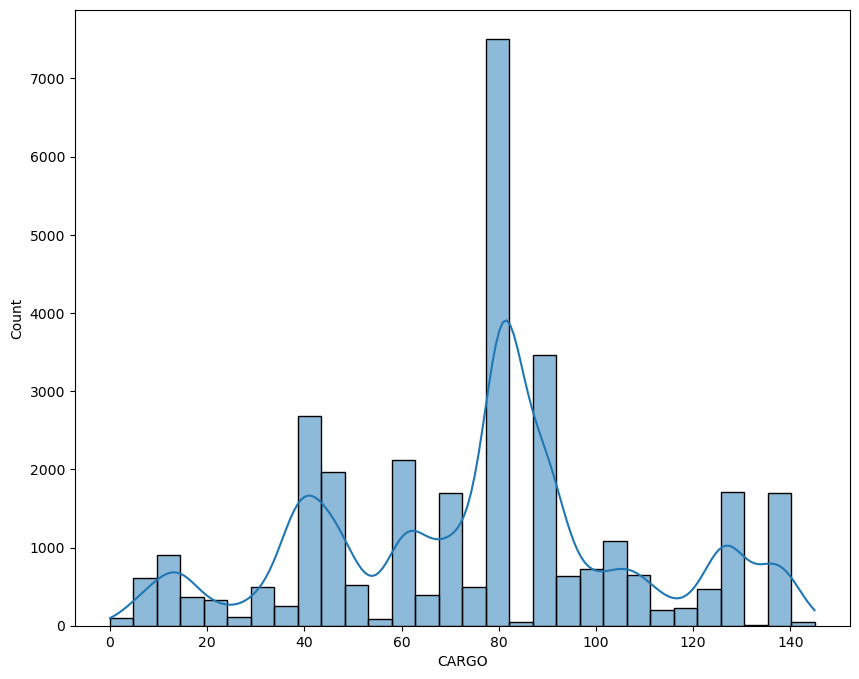

In [300]:
plt.figure(figsize=(10,8))
sns.histplot(makasar['CARGO'], bins=30, kde=True);

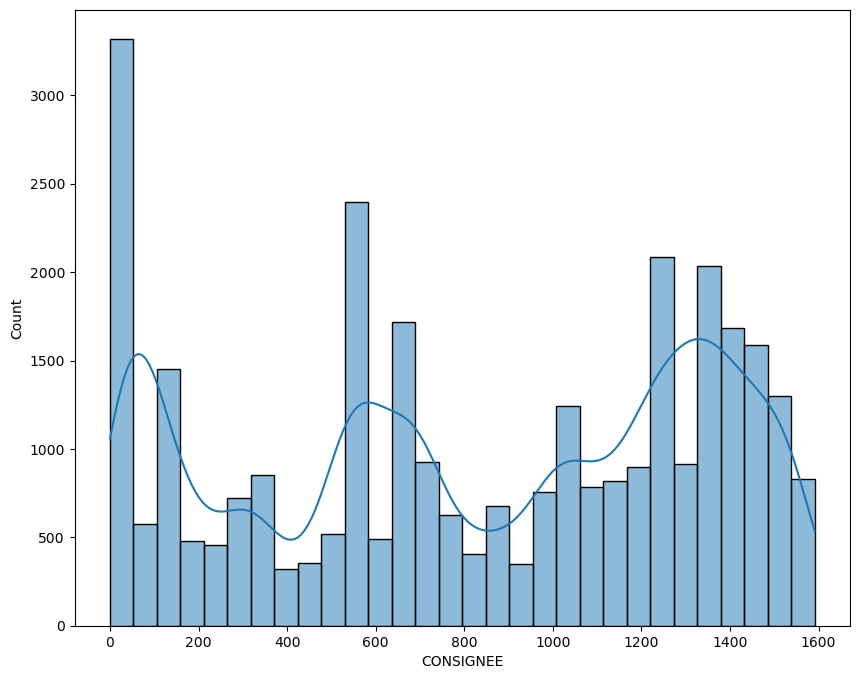

In [301]:
plt.figure(figsize=(10,8))
sns.histplot(makasar['CONSIGNEE'], bins=30, kde=True);

In [46]:
makasar.describe(include='all')

,CONSIGNEE,CARGO,grade_0,grade_1,grade_2,size_0,size_1,Lead Time (Days)
count,31581.000000,31581.000000,31581.000000,31581.000000,31581.000000,31581.000000,31581.000000,31581.000000
mean,825.385738,75.958203,0.762009,0.137899,0.100092,0.726259,0.273741,4.974890
std,501.213646,32.384677,0.425860,0.344800,0.300127,0.445884,0.445884,2.603434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,378.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,870.000000,81.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000
75%,1306.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000
max,1591.000000,145.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [47]:
makasar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31581 entries, 0 to 33325
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CONSIGNEE         31581 non-null  int64
 1   CARGO             31581 non-null  int64
 2   grade_0           31581 non-null  int64
 3   grade_1           31581 non-null  int64
 4   grade_2           31581 non-null  int64
 5   size_0            31581 non-null  int64
 6   size_1            31581 non-null  int64
 7   Lead Time (Days)  31581 non-null  int64
dtypes: int64(8)
memory usage: 2.2 MB


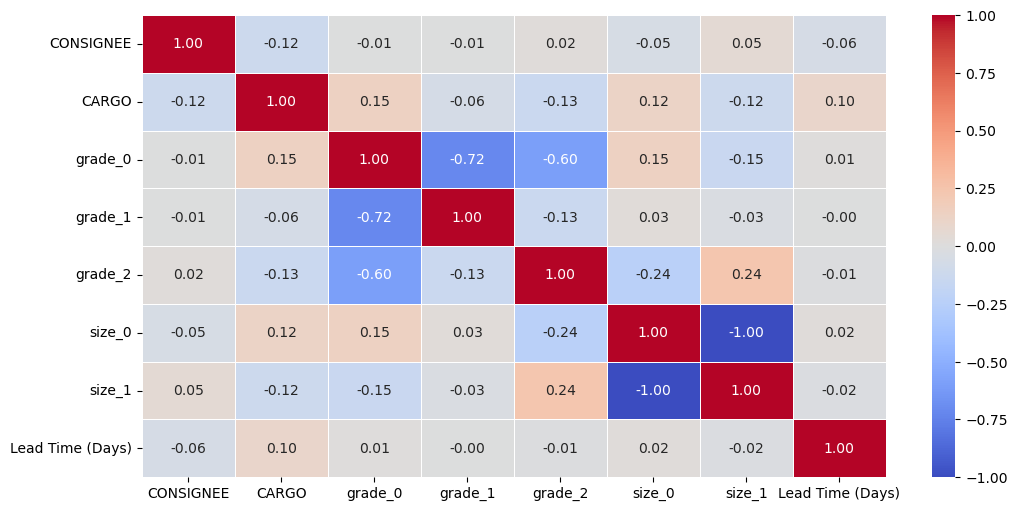

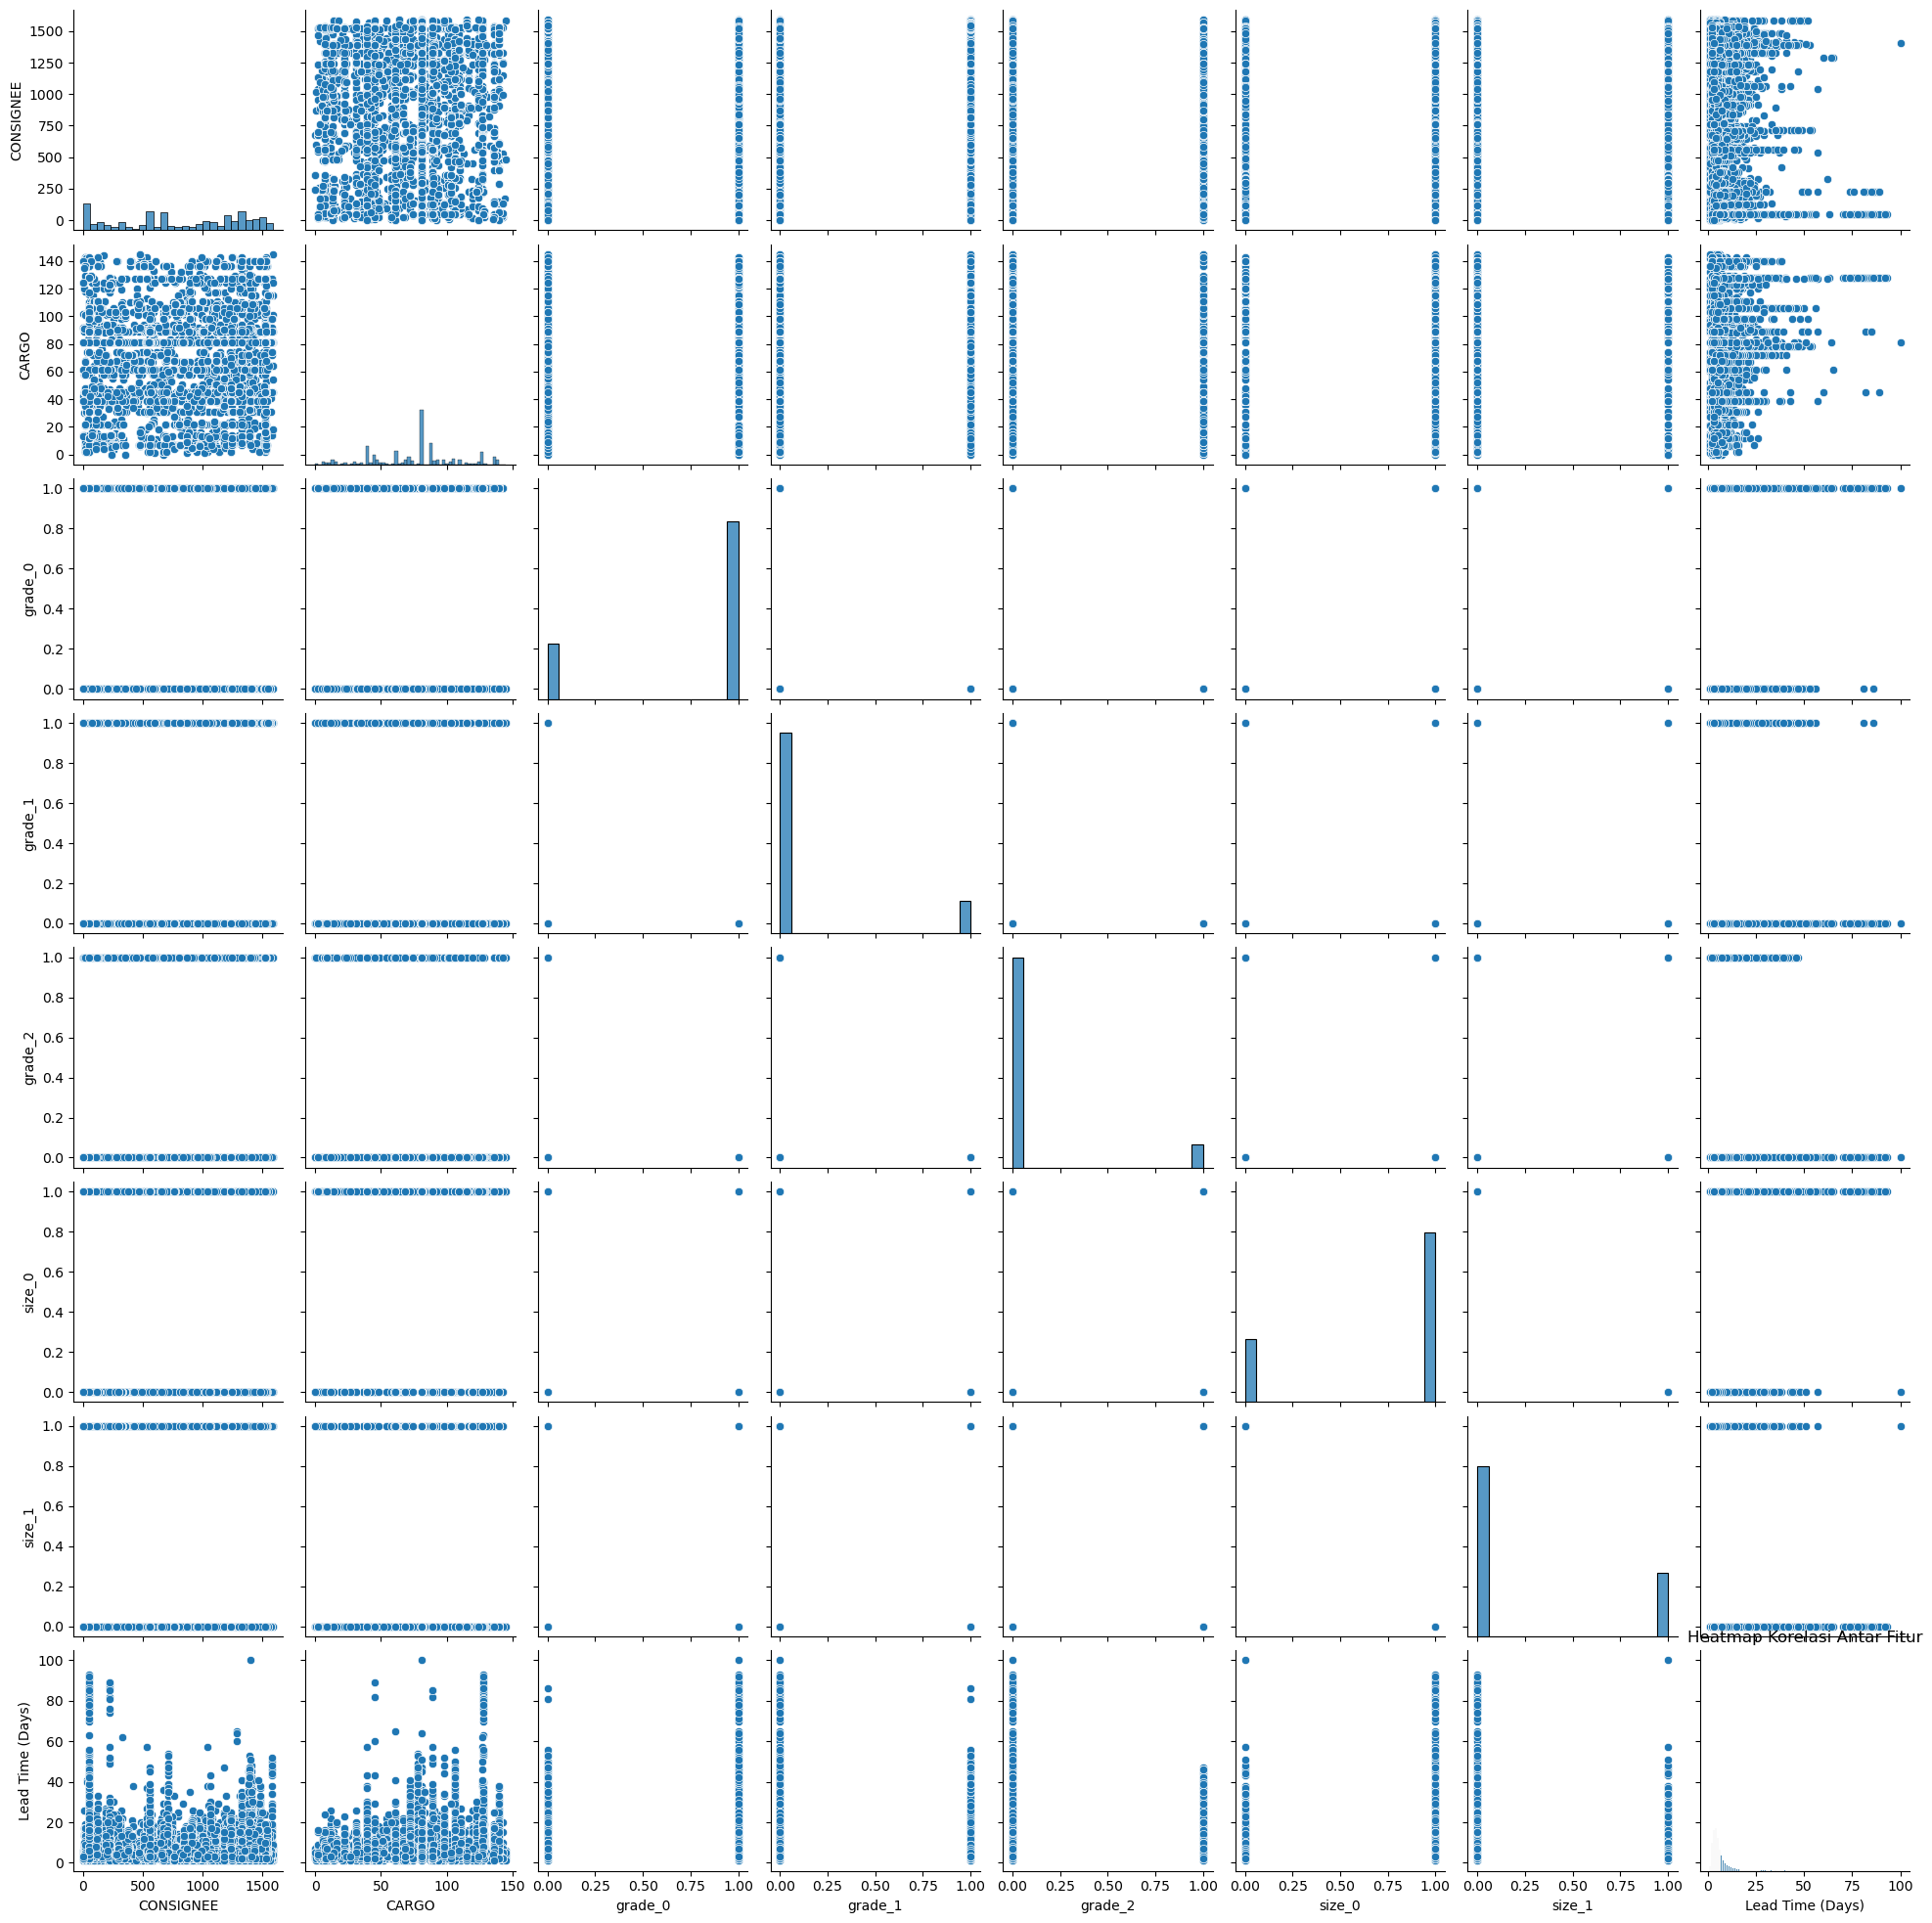

In [285]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(makasar.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
sns.pairplot(makasar)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

## Explore model

### Model Cabang makasar

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [23]:
import tensorflow as tf

In [24]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
X = makasar[['CONSIGNEE','CARGO','grade_0','grade_1','grade_2','size_0','size_1']].values
y = makasar["Lead Time (Days)"].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
model_1 = linear_model.Ridge(alpha=0.5)
model_1.fit(X, y)

Ridge(alpha=0.5)

In [28]:
model_1.score(X, y)

0.008604798697022908

In [29]:
y_ = model_1.predict(X)

In [30]:
mean_absolute_error( y, y_)

2.02161306033376

In [31]:
mean_squared_error(y, y_)

6.7193335502523075

In [32]:
r2_score(y, y_)

0.008604798697022908

In [33]:
model_1_score = {'mean_absolute_error': mean_absolute_error(y, y_), 'mean_squared_error':mean_squared_error(y, y_), "r2_score":r2_score(y, y_)}

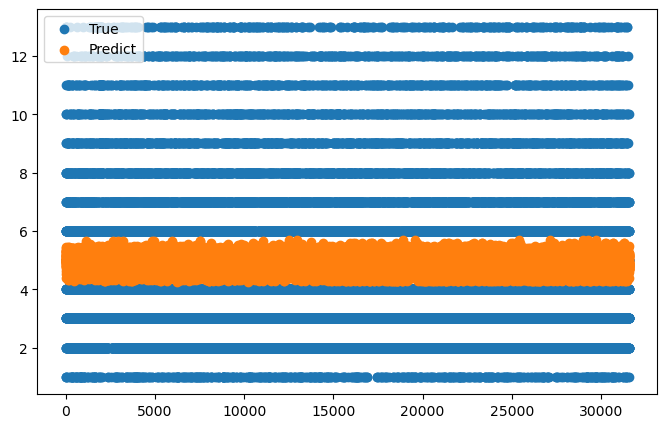

In [34]:
x = np.arange(0, len(y))
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.scatter(x, y_)
plt.legend(["True", "Predict"])

#### Randomforset Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
model_2 = RandomForestRegressor(n_estimators=50)

In [101]:
model_2.fit(X, y)

C:\Users\HP\OneDrive\Documents\anaconda\envs\machine-learning\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50)

In [102]:
model_2.score(X, y)

0.3755630485101602

In [103]:
y_2 = model_2.predict(X)

In [104]:
mean_absolute_error(y, y_2)

1.529362210683196

In [105]:
mean_squared_error(y, y_2)

4.23221753812049

In [106]:
r2_score(y, y_2)

0.3755630485101602

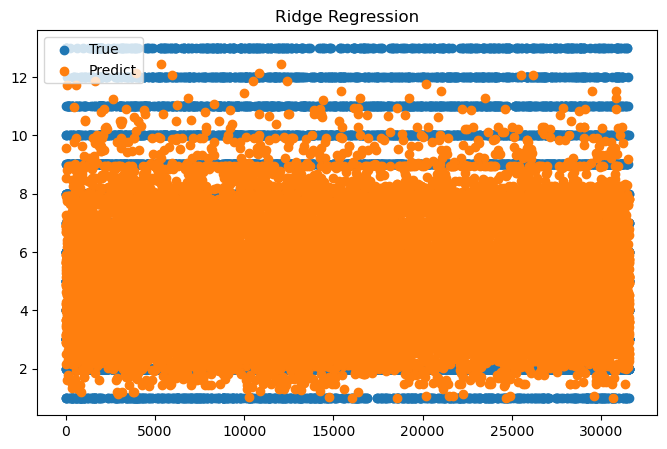

In [107]:
x = np.arange(0, len(y))
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.scatter(x, y_2)
plt.title("Ridge Regression")
plt.legend(["True", "Predict"])

In [108]:
model_2_score = {'mean_absolute_error': mean_absolute_error(y, y_2), 'mean_squared_error':mean_squared_error(y, y_2), "r2_score":r2_score(y, y_2)}

#### NeuralNetwork Regression

In [159]:
import tensorflow as tf
X_consign = makasar["CONSIGNEE"].values
X_cargo = makasar["CARGO"].values
X_onehot = makasar[["grade_0","grade_1","grade_2","size_0","size_1"]].values
y = makasar["Lead Time (Days)"].values.reshape((-1,1))

In [46]:
input_cargo = tf.keras.layers.Input(shape=(1,))
input_cosign = tf.keras.layers.Input(shape=(1,))
embed_cargo = tf.keras.layers.Embedding(2000, 10)(input_cargo)
embed_cosign = tf.keras.layers.Embedding(500, 10)(input_cosign)
flatten_cargo = tf.keras.layers.Flatten()(embed_cargo)
flatten_cosign = tf.keras.layers.Flatten()(embed_cosign)
inputs = tf.keras.layers.Input(shape=(5,))
merge = tf.keras.layers.Concatenate()([flatten_cosign, flatten_cargo, inputs])
x = tf.keras.layers.Dense(64, activation="relu")(merge)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)
model_5 = tf.keras.Model(inputs=[input_cargo, input_cosign, inputs], outputs=outputs)

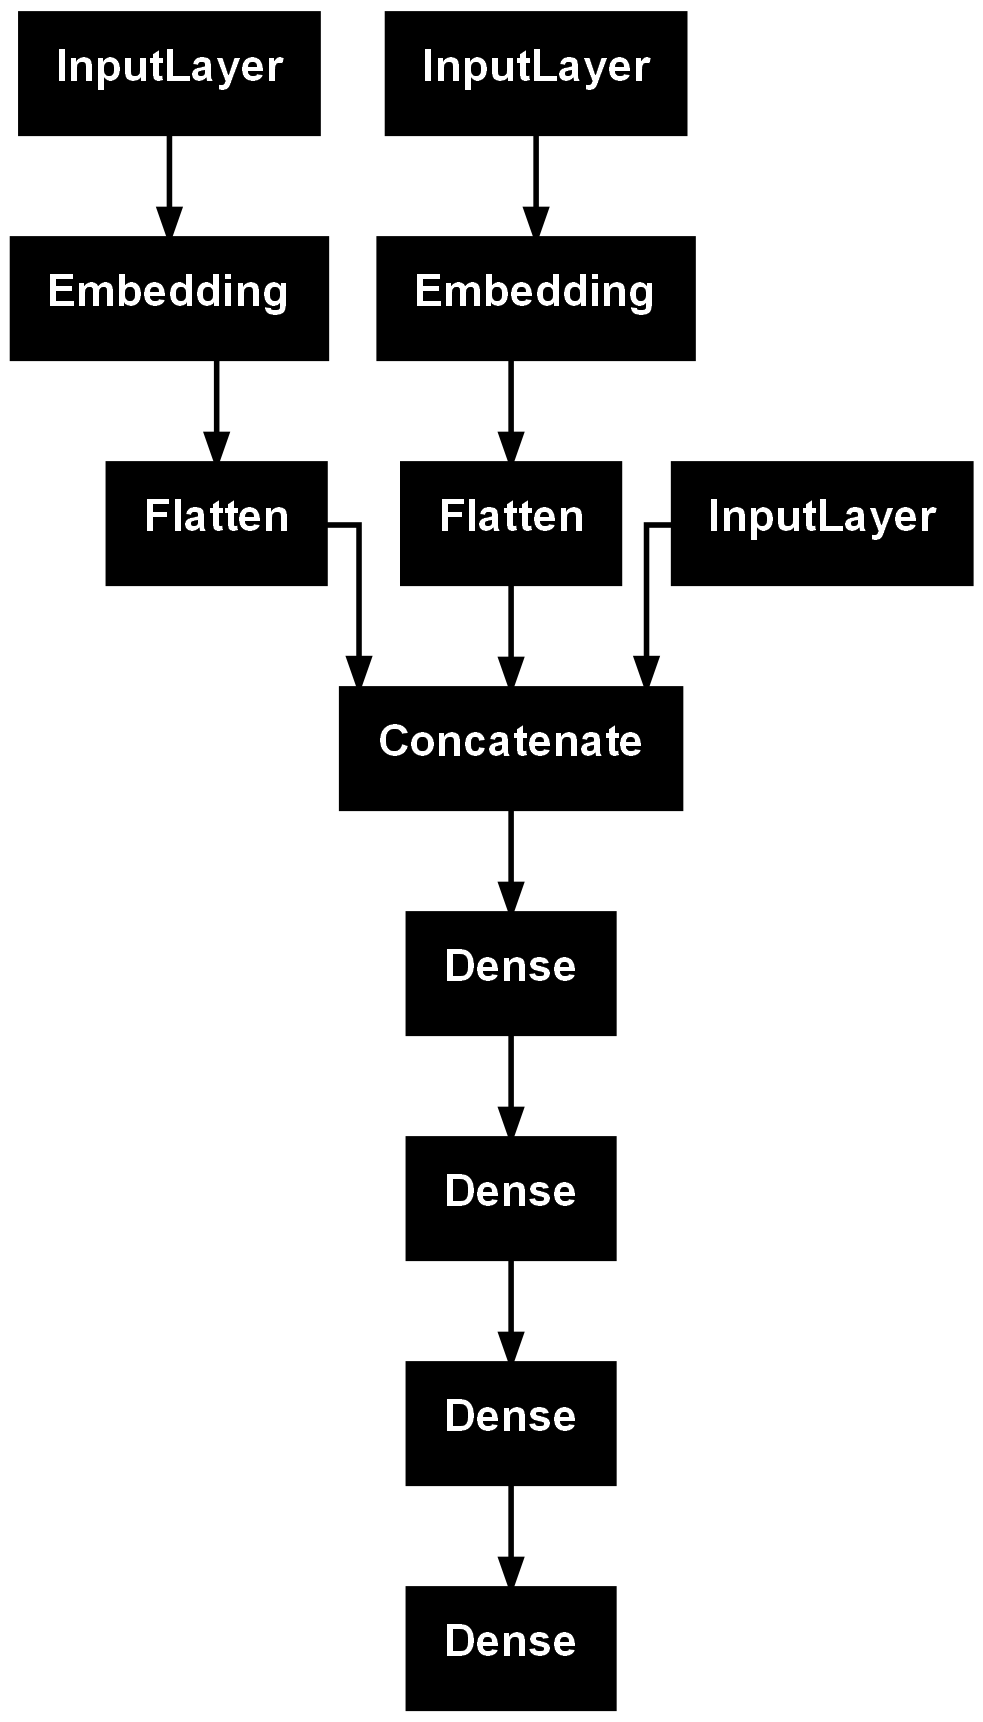

In [47]:
tf.keras.utils.plot_model(model_5)

In [48]:
model_5.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae', metrics=['mae', 'mse'])

In [49]:
model_5.fit((X_consign,X_cargo, X_onehot), y, epochs=100, batch_size=32)

Epoch 1/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - loss: 2.2145 - mae: 2.2145 - mse: 9.0956
Epoch 2/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 1.7127 - mae: 1.7127 - mse: 5.5248
Epoch 3/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - loss: 1.6707 - mae: 1.6707 - mse: 5.2740
Epoch 4/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 1.6361 - mae: 1.6361 - mse: 5.1088
Epoch 5/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 1.6402 - mae: 1.6402 - mse: 5.1885
Epoch 6/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 1.6218 - mae: 1.6218 - mse: 5.0799
Epoch 7/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 1.6143 - mae: 1.6143 - mse: 5.0359
Epoch 8/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 1.6133 - mae: 1.6133 - mse: 5.0275
Epoch 9/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - loss: 1.5957 - mae: 1.5957 - mse: 4.9715
Epoch 10/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - loss: 1.6068 - mae: 1.6068 - mse: 5.0173
Epoch 11/100
987/98

In [50]:
y_5 = model_5.predict((X_consign,X_cargo, X_onehot))

987/987 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step


In [51]:
y_5

array([[4.027854 ],
       [5.998483 ],
       [4.1616917],
       ...,
       [1.9661648],
       [4.848383 ],
       [3.948685 ]], dtype=float32)

In [52]:
model_5_score = {'mean_absolute_error': mean_absolute_error(y, np.reshape(y_5,[-1])), 'mean_squared_error':mean_squared_error( y, np.reshape(y_5,[-1])), "r2_score": r2_score( y, np.reshape(y_5,[-1]))}

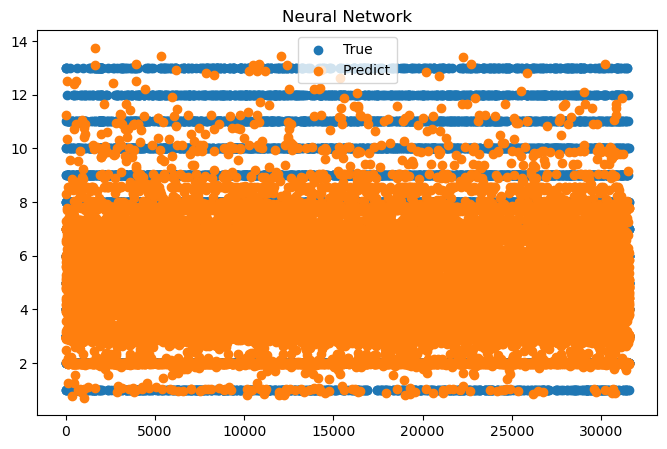

In [53]:
x = np.arange(0, len(y))
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.scatter(x, y_5)
plt.title("Neural Network")
plt.legend(["True", "Predict"])

In [54]:
!pip install -U xgboost
import xgboost as xgb
dtrain = xgb.DMatrix(X, label=y)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 4,
    'learning_rate': 0.1,
    'n_estimators': 100
}

model = xgb.train(params, dtrain, num_boost_round=100)


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\HP\OneDrive\Documents\anaconda\envs\machine-learning\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [55]:
y_6 = model.predict(dtrain)
model_6_score = {'mean_absolute_error': mean_absolute_error( y, y_6), 'mean_squared_error':mean_squared_error( y, y_6), "r2_score": r2_score( y, y_6)}
model_6_score

{'mean_absolute_error': 1.7953509842782116,
 'mean_squared_error': 5.42628349533446,
 'r2_score': 0.19938616263779185}

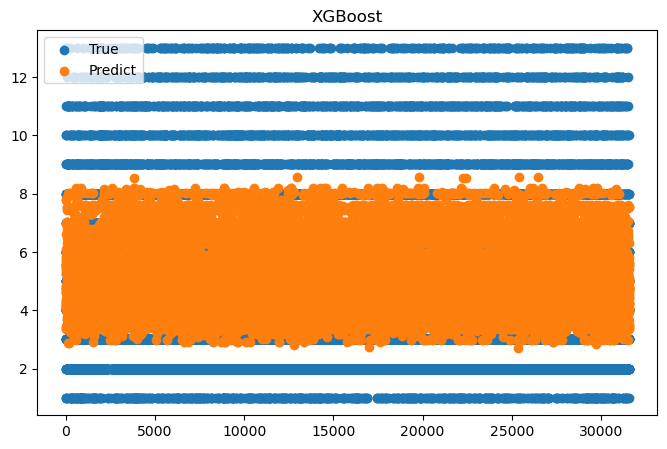

In [56]:
x = np.arange(0, len(y))
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.scatter(x, y_6)
plt.title("XGBoost")
plt.legend(["True", "Predict"])

In [109]:
model_compare = pd.DataFrame({"Ridge Regression":model_1_score,"RandomForest Regression":model_2_score,"Neural Network":model_5_score, "XGBoost":model_6_score})

In [110]:
model_compare.T.to_excel("makasar.xlsx")

In [111]:
model_compare.T

,mean_absolute_error,mean_squared_error,r2_score
Ridge Regression,2.021613,6.719334,0.008605
RandomForest Regression,1.529362,4.232218,0.375563
Neural Network,1.472498,4.579373,0.324342
XGBoost,1.795351,5.426283,0.199386


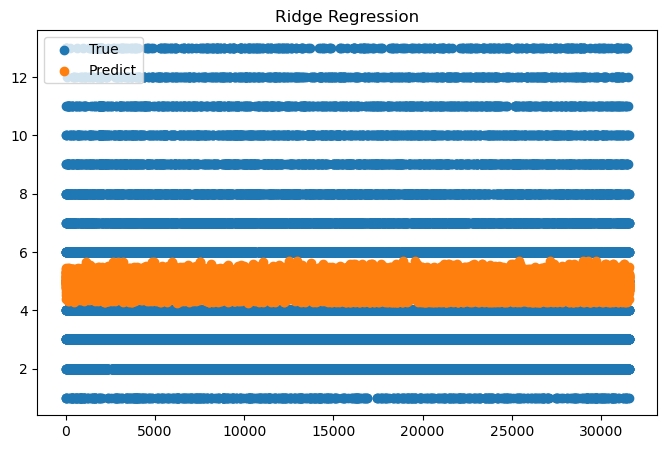

In [112]:
x = np.arange(0, len(y))
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.scatter(x, y_)
plt.title("Ridge Regression")
plt.legend(["True", "Predict"])

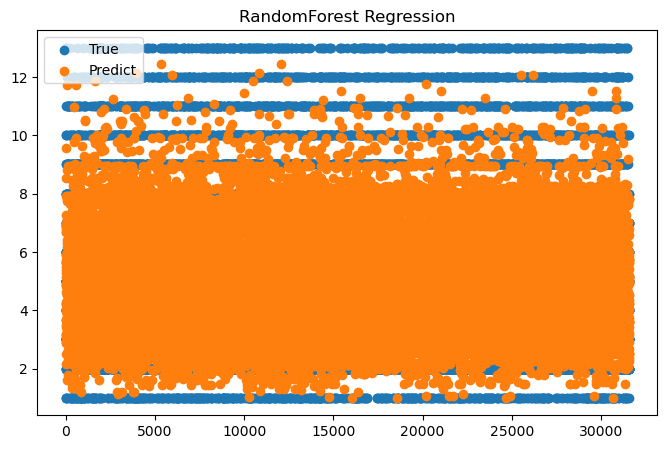

In [113]:
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.scatter(x, y_2)
plt.title("RandomForest Regression")
plt.legend(["True", "Predict"])

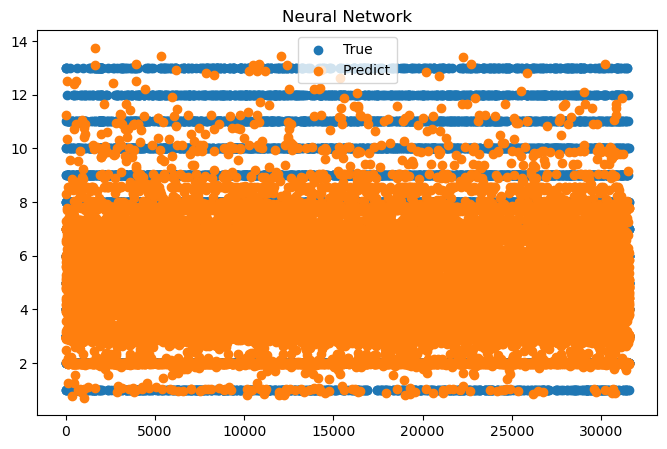

In [114]:
x = np.arange(0, len(y))
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.scatter(x, y_5)
plt.title("Neural Network")
plt.legend(["True", "Predict"])

In [68]:
import pickle
with open('ridge_makasar_all_data.pkl','wb') as f:
    pickle.dump(model_1,f)

In [115]:
import pickle
with open('random_forest_makasar_all_data.pkl','wb') as f:
    pickle.dump(model_2,f)

In [82]:
import pickle
with open('XGBoost_makasar.pkl','wb') as f:
    pickle.dump(model,f)

In [99]:
model_5.save("neural_network_makasar.keras")

In [121]:
rf = RandomForestRegressor(random_state=42)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\HP\OneDrive\Documents\anaconda\envs\machine-learning\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\OneDrive\Documents\anaconda\envs\machine-learning\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\OneDrive\Documents\anaconda\envs\machine-learning\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\OneDrive\Documents\anaconda\envs\machine-learning\L

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [126]:
best_rf = grid_search.best_estimator_
best_rf.fit(X, y)

C:\Users\HP\OneDrive\Documents\anaconda\envs\machine-learning\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200, random_state=42)

In [127]:
best_rf.score(X,y)

0.3307603019577324

In [129]:
y_pred = best_rf.predict(X)

In [130]:
mean_absolute_error(y,y_pred)

1.617957675287666

In [177]:
input_cargo = tf.keras.layers.Input(shape=(1,))
input_cosign = tf.keras.layers.Input(shape=(1,))
embed_cargo = tf.keras.layers.Embedding(2000, 10)(input_cargo)
embed_cosign = tf.keras.layers.Embedding(500, 10)(input_cosign)
flatten_cargo = tf.keras.layers.Flatten()(embed_cargo)
flatten_cosign = tf.keras.layers.Flatten()(embed_cosign)
inputs = tf.keras.layers.Input(shape=(5,))
merge = tf.keras.layers.Concatenate()([flatten_cosign, flatten_cargo, inputs])
x = tf.keras.layers.Dense(16, activation="relu")(merge)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)
model_7 = tf.keras.Model(inputs=[input_cargo, input_cosign, inputs], outputs=outputs)

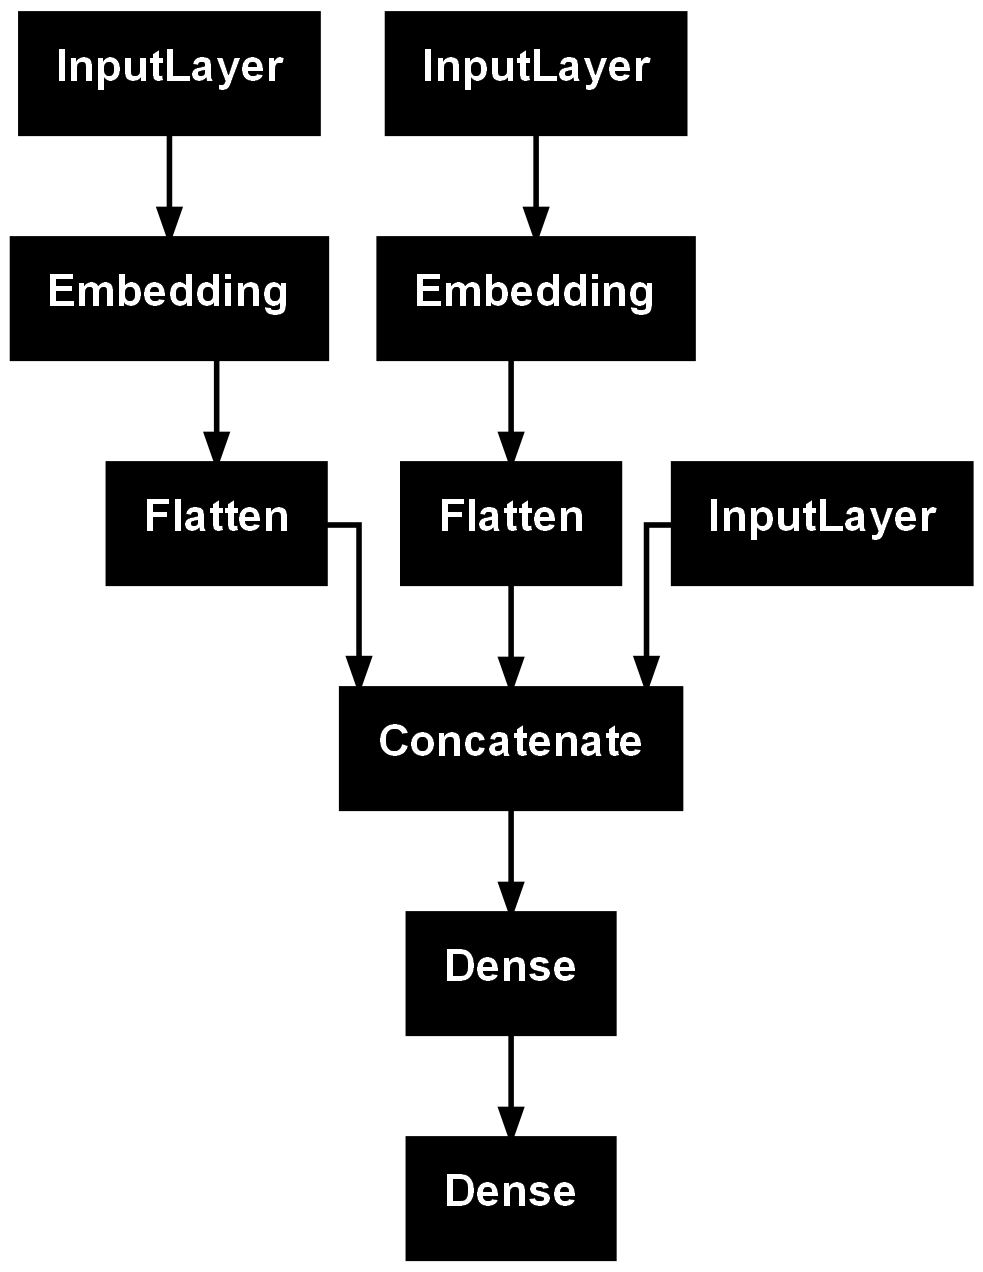

In [178]:
tf.keras.utils.plot_model(model_7)

In [179]:
model_7.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae', metrics=['mae', 'mse'])

In [180]:
model_7.fit((X_consign,X_cargo, X_onehot), y, epochs=100, batch_size=32)

Epoch 1/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 2.8317 - mae: 2.8317 - mse: 14.0971
Epoch 2/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1.7294 - mae: 1.7294 - mse: 5.6024
Epoch 3/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1.6922 - mae: 1.6922 - mse: 5.4094
Epoch 4/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.6789 - mae: 1.6789 - mse: 5.3419
Epoch 5/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.6759 - mae: 1.6759 - mse: 5.3674
Epoch 6/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.6362 - mae: 1.6362 - mse: 5.1834
Epoch 7/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.6510 - mae: 1.6510 - mse: 5.2577
Epoch 8/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.6457 - mae: 1.6457 - mse: 5.2138
Epoch 9/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 1.6436 - mae: 1.6436 - mse: 5.2203
Epoch 10/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.6213 - mae: 1.6213 - mse: 5.1022
Epoch 11/100
987/987 ━━━━━━━━━━━━━━━━